# Google Mobility 


https://www.google.com/covid19/mobility/

In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import json
import scipy

In [5]:
filename = '2021_TH_Region_Mobility_Report.csv'
path = os.path.join(r'C:\Users\kasiditp\Desktop\datasets',filename)

In [6]:
df = pd.read_csv(path)

In [9]:
df.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,TH,Thailand,NaN,NaN,NaN,NaN,NaN,ChIJsU1CR_eNTTARAuhXB4gs154,2021-01-01,-20,7,8,-57,-70,14
1,TH,Thailand,NaN,NaN,NaN,NaN,NaN,ChIJsU1CR_eNTTARAuhXB4gs154,2021-01-02,-23,3,-17,-49,-43,8
2,TH,Thailand,NaN,NaN,NaN,NaN,NaN,ChIJsU1CR_eNTTARAuhXB4gs154,2021-01-03,-20,6,-23,-43,-17,4
3,TH,Thailand,NaN,NaN,NaN,NaN,NaN,ChIJsU1CR_eNTTARAuhXB4gs154,2021-01-04,-18,7,-29,-44,-16,7
4,TH,Thailand,NaN,NaN,NaN,NaN,NaN,ChIJsU1CR_eNTTARAuhXB4gs154,2021-01-05,-20,5,-30,-46,-18,8


In [16]:
#see that all categorical columns have only one value
df_categorical_col = df.loc[:,['country_region_code','country_region','place_id']]
df_categorical_col.value_counts()

country_region_code  country_region  place_id                   
TH                   Thailand        ChIJsU1CR_eNTTARAuhXB4gs154    351
dtype: int64

In [19]:
# change to datetime type
df['date'] = pd.to_datetime(df['date'])

In [21]:
df = df.sort_values(by=['date'])

In [26]:
# extract only necessary columns
df1 = df.iloc[:,8:]
df1.head()

,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,2021-01-01,-20,7,8,-57,-70,14
1,2021-01-02,-23,3,-17,-49,-43,8
2,2021-01-03,-20,6,-23,-43,-17,4
3,2021-01-04,-18,7,-29,-44,-16,7
4,2021-01-05,-20,5,-30,-46,-18,8


In [56]:
df1.describe()

,retail,grocery,parks,transit,workplaces,residential
count,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,-10.002849,14.698006,-31.754986,-46.116809,-15.370370,4.569801
std,12.719052,10.362844,12.265041,11.397520,12.260255,4.752154
min,-35.000000,-5.000000,-56.000000,-69.000000,-70.000000,-5.000000
25%,-20.000000,6.000000,-41.500000,-54.500000,-23.000000,1.000000
50%,-11.000000,14.000000,-34.000000,-49.000000,-15.000000,5.000000
75%,2.000000,23.000000,-22.000000,-36.000000,-6.000000,8.000000
max,17.000000,36.000000,30.000000,-22.000000,7.000000,19.000000


In [52]:
# change columns name
df1.columns = [i.split('_')[0] for i in df1.columns ]

<AxesSubplot:xlabel='date'>

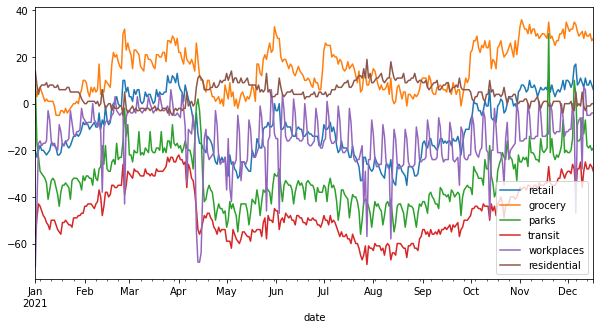

In [55]:
# Lets plot
df1.plot(x='date', kind='line',figsize=(10,5)) 

 # Covid api
 

In [58]:
import requests
response = requests.get("https://covid19.ddc.moph.go.th/api/Cases/round-1to2-by-provinces")

In [62]:
data_json = response.json() 

In [79]:
data_round12= pd.DataFrame(data_json)

In [ ]:
data_round12.head()

In [106]:
dfCov12= data_round12.groupby(['province','txn_date']).sum().loc['กรุงเทพมหานคร']['new_case']
dfCov12_1 = dfCov12.to_frame()
dfCov12_1 = dfCov12_1.reset_index()
dfCov12_1['round_number'] = '1/2'

In [107]:
dfCov12_1.head()

,txn_date,new_case,round_number
0,2020-01-12,1,1/2
1,2020-01-13,0,1/2
2,2020-01-14,0,1/2
3,2020-01-15,0,1/2
4,2020-01-16,0,1/2


In [84]:
# round 3
response1 = requests.get("https://covid19.ddc.moph.go.th/api/Cases/timeline-cases-by-provinces")
data_json1 = response1.json() 
data_round3 = pd.DataFrame(data_json1)

In [86]:
data_round3.head()

,txn_date,province,new_case,total_case,new_case_excludeabroad,total_case_excludeabroad,new_death,total_death,update_date
0,2021-04-01,กระบี่,0,27,0,20,0,0,2021-09-01 07:40:49
1,2021-04-01,กรุงเทพมหานคร,11,4855,7,3492,0,35,2021-09-01 07:40:49
2,2021-04-01,กาญจนบุรี,0,16,0,14,0,0,2021-09-01 07:40:49
3,2021-04-01,กาฬสินธุ์,0,4,0,4,0,0,2021-09-01 07:40:49
4,2021-04-01,กำแพงเพชร,0,2,0,2,0,0,2021-09-01 07:40:49


In [104]:
dfCov3= data_round3.groupby(['province','txn_date']).sum().loc['กรุงเทพมหานคร']['new_case']
dfCov3_1 = dfCov3.to_frame()
dfCov3_1 = dfCov3_1.reset_index()
dfCov3_1['round_number'] = '3'

In [105]:
dfCov3_1.head()

,txn_date,new_case,round_number
0,2021-04-01,11,3
1,2021-04-02,24,3
2,2021-04-03,41,3
3,2021-04-04,41,3
4,2021-04-05,55,3


In [110]:
# combine covid case data
dfCov = pd.concat([dfCov12_1,dfCov3_1])

In [133]:
dfCov.head()

,txn_date,new_case,round_number
0,2020-01-12,1,1/2
1,2020-01-13,0,1/2
2,2020-01-14,0,1/2
3,2020-01-15,0,1/2
4,2020-01-16,0,1/2


In [120]:
dfCov['txn_date'] = pd.to_datetime(dfCov['txn_date'])

In [121]:
dfCov.tail()

,txn_date,new_case,round_number
260,2021-12-17,588,3
261,2021-12-18,589,3
262,2021-12-19,430,3
263,2021-12-20,420,3
264,2021-12-21,578,3


In [127]:
dfCov[(dfCov['txn_date'] >= '2020-12-01') & (dfCov['txn_date'] <= '2021-03-31')]

,txn_date,new_case,round_number
324,2020-12-01,8,1/2
325,2020-12-02,6,1/2
326,2020-12-03,4,1/2
327,2020-12-04,4,1/2
328,2020-12-05,6,1/2
...,...,...,...
440,2021-03-27,52,1/2
441,2021-03-28,40,1/2
442,2021-03-29,17,1/2
443,2021-03-30,25,1/2


Text(0.5, 1.0, 'Covid case')

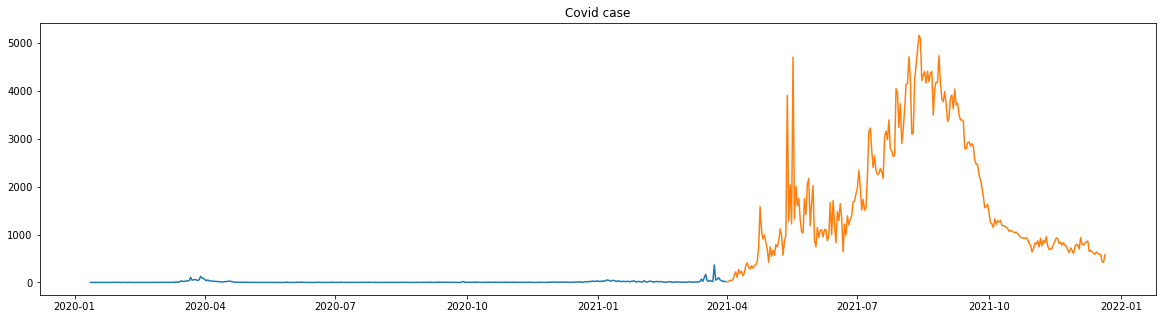

In [151]:
fig = plt.figure(figsize=[20,5])
plt.plot(dfCov[dfCov['round_number'] == '1/2']['txn_date'],dfCov[dfCov['round_number'] == '1/2']['new_case'])
plt.plot(dfCov[dfCov['round_number'] == '3']['txn_date'],dfCov[dfCov['round_number'] == '3']['new_case'])
plt.title('Covid case')

Text(0.5, 1.0, 'Covid case')

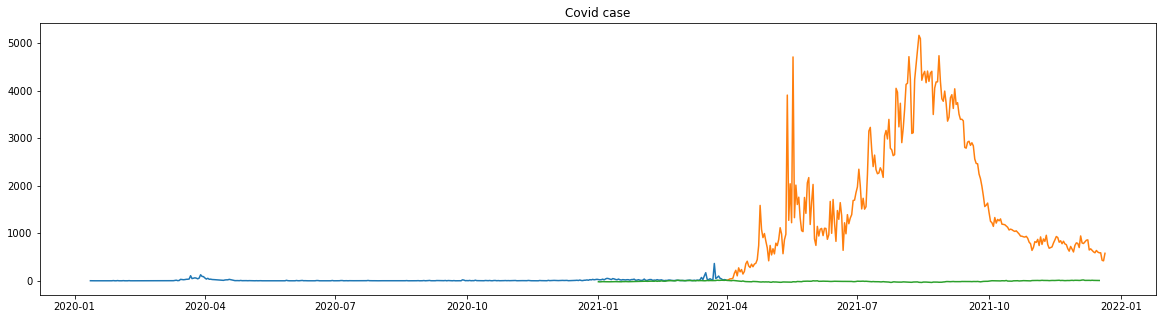

In [153]:
fig = plt.figure(figsize=[20,5])
plt.plot(dfCov[dfCov['round_number'] == '1/2']['txn_date'],dfCov[dfCov['round_number'] == '1/2']['new_case'])
plt.plot()
plt.plot(df1['date']dfCov[dfCov['round_number'] == '3']['txn_date'],dfCov[dfCov['round_number'] == '3']['new_case'],df1['retail'])
plt.title('Covid case')

In [178]:
#scaling data
dfCov_scaled = dfCov.copy()
dfCov_scaled['new_case'] = (dfCov_scaled['new_case']-dfCov_scaled['new_case'].min())/(dfCov_scaled['new_case'].max()-dfCov_scaled['new_case'].min())
df1_scaled = df1.copy()
for i in df1_scaled.columns[1:]:
    df1_scaled[i] = (df1_scaled[i]-df1_scaled[i].min())/(df1_scaled[i].max()-df1_scaled[i].min())


<Figure size 1440x2880 with 0 Axes>

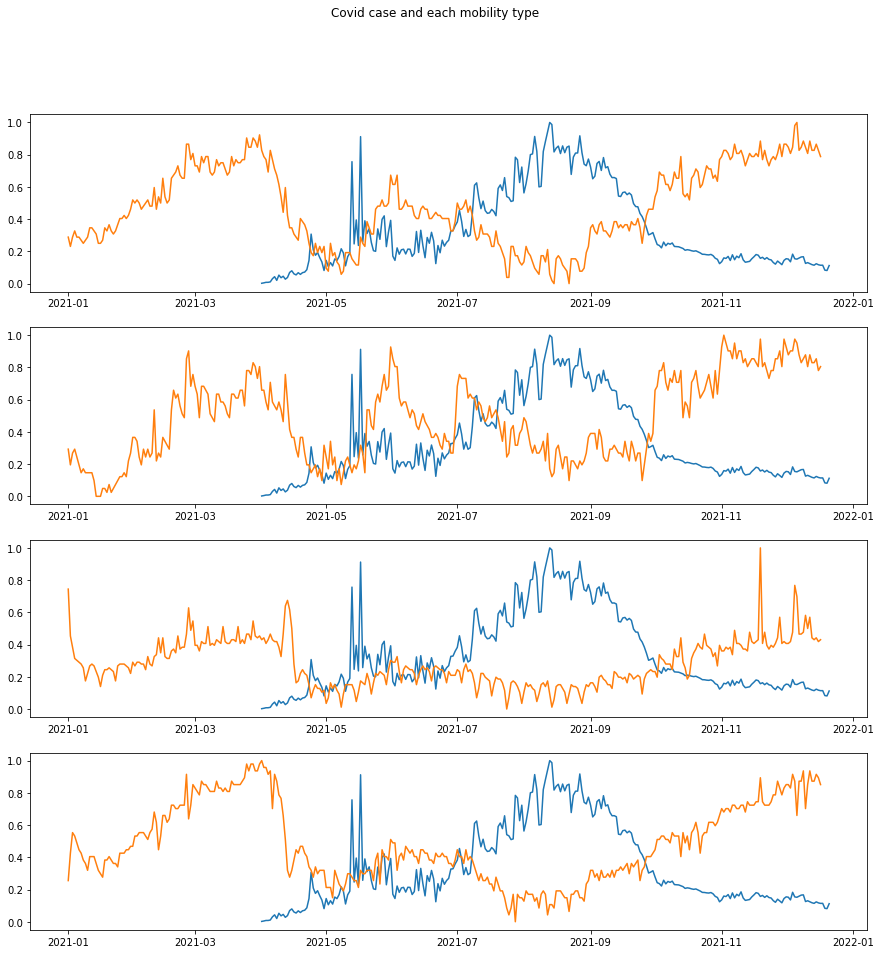

In [181]:
plt.figure(figsize=(20, 40))
fig, axs = plt.subplots(4,figsize=(15,15))
fig.suptitle('Covid case and each mobility type')
for i in range(4):
    axs[i].plot(dfCov_scaled[dfCov_scaled['round_number'] == '3']['txn_date'],dfCov_scaled[dfCov['round_number'] == '3']['new_case'])
    axs[i].plot(df1_scaled['date'],df1_scaled[df1.columns[i+1]])
plt.show()

In [213]:
# peason correlation
from scipy import stats
for i in range(len(df1_scaled.columns)-1):
    print(df1_scaled.columns[i+1])
    print(scipy.stats.pearsonr(dfCov_scaled[dfCov_scaled['txn_date'].isin(df1_scaled['date'])]['new_case'],df1_scaled.iloc[:,i+1]))

retail
(-0.5906218530391387, 2.217231890607545e-34)
grocery
(-0.26078418633784006, 7.257191831123979e-07)
parks
(-0.6067414336263626, 1.1324898817911364e-36)
transit
(-0.6772647433923248, 1.9261530037912925e-48)
workplaces
(-0.31641267341534995, 1.3333370917641154e-09)
residential
(0.6481372728598289, 3.3445460509074776e-43)
